# Non-Linear SVM Demonstration

This notebook demonstrates a support vector machine model for a non-linear classification problem.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.datasets import make_circles

## Helper Function

Define a transformation function to add a third dimension.

In [2]:
def transform_to_3d(X: np.ndarray) -> np.ndarray:
    """
    Define a transformation function to add a third dimension.

    Args:
        X (np.ndarray): The input data.

    Returns:
        np.ndarray: The transformed data.
    """
    return np.c_[X, X[:, 0]**2 + X[:, 1]**2]

## Generate Non-Linear Data

Generate 2D circular data that is not linearly separable.

In [3]:
# Generate 2D data.
X, y = make_circles(100, factor=0.1, noise=0.1)

## Train SVM with RBF Kernel

Fit an SVM model with RBF kernel for non-linear classification.

In [4]:
# Fit the SVM model.
svm_model = SVC(kernel="rbf", C=1, gamma="auto")
svm_model.fit(X, y)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Visualize 2D Non-Linear Decision Boundary

Plot the 2D data with the non-linear decision boundary.

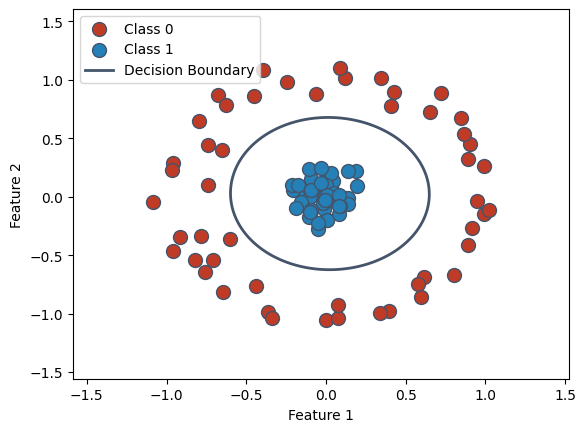

In [5]:
# Plot the 2D data.
X_class_0 = X[y == 0]
X_class_1 = X[y == 1]

plt.scatter(
    X_class_0[:, 0], X_class_0[:, 1],
    color="#C03B26", s=100, edgecolor="#44546A", label="Class 0"
)
plt.scatter(
    X_class_1[:, 0], X_class_1[:, 1],
    color="#2580B7", s=100, edgecolor="#44546A", label="Class 1"
)

# Create a grid to plot the decision boundary.
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 500),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 500)
)
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="#44546A")
plt.plot(
    [], [], color="#44546A", linestyle="-",
    linewidth=2, label="Decision Boundary"
)

# Add legend to the plot.
plt.legend(loc="upper left")

# Customize plot appearance to match the style.
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(X_class_0[:, 0].min() - 0.5, X_class_0[:, 0].max() + 0.5)
plt.ylim(X_class_0[:, 1].min() - 0.5, X_class_0[:, 1].max() + 0.5)

# Show plot.
plt.show()

## Transform Data to 3D Space

Transform the 2D data to 3D space to visualize the linear separation in higher dimensions.

In [6]:
# Transform the data to 3D.
X_3d = transform_to_3d(X)
X_class_0 = X_3d[y == 0]
X_class_1 = X_3d[y == 1]

## Visualize 3D Data with Decision Surface

Plot the 3D transformed data with the decision surface.

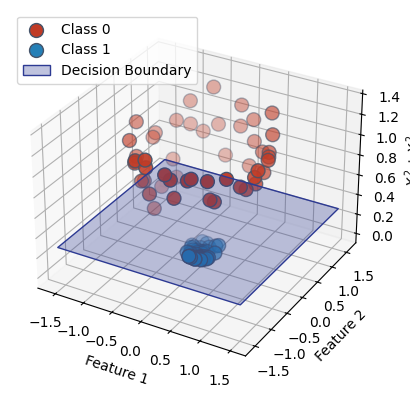

In [7]:
# Plot the 3D data.
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X_class_0[:, 0], X_class_0[:, 1], X_class_0[:, 2],
    color="#C03B26", s=100, edgecolor="#44546A", label="Class 0"
)
ax.scatter(
    X_class_1[:, 0], X_class_1[:, 1], X_class_1[:, 2],
    color="#2580B7", s=100, edgecolor="#44546A", label="Class 1"
)

# Create a grid to plot the decision boundary.
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 50),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 50)
)
zz = np.ones_like(xx) * (X_class_0[:, 2].min() + X_class_1[:, 2].max()) / 2

# Predict the decision function for each point in the grid.
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary as a 3D surface.
ax.plot_surface(
    xx, yy, zz, facecolors=plt.cm.coolwarm(Z),
    alpha=0.3, rstride=100, cstride=100, label="Decision Boundary"
)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("$X_1^2 + X_2^2$")
plt.legend(loc="upper left")
plt.show()